In [2]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute, transpile, assemble
from qiskit.visualization import *
from qiskit.quantum_info import Statevector
#from qiskit.visualization import plot_bloch_multivector, plot_histogram
#from qiskit_textbook.problems import dj_problem_oracle

In [35]:
# Question #1
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc_1 = QuantumCircuit(qr,cr)
# lets set control in superpositon of all states |+⟩
# when unitary is X gate and and target is set to the eigenvalue |-⟩ that can be obtained by applying H on |1⟩ state 
qc_1.h(0)
qc_1.x(1) # set target to 1
qc_1.h(1) # set target qubit to |-⟩
qc_1.cx(0,1)
# since our state is a product state and seperable we can make a partial measurement 
# and collapse state one qubit quantum state, let's measure MSB or the target qubit in this case  
qc_1.measure([1],[0]) 
qc_1.draw()

┌───┐             
q164_0: ┤ H ├───────■─────
        ├───┤┌───┐┌─┴─┐┌─┐
q164_1: ┤ X ├┤ H ├┤ X ├┤M├
        └───┘└───┘└───┘└╥┘
 c14: 1/════════════════╩═
                        0

In [36]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc_1, backend, shots=1)
sv = job.result().get_statevector(qc_1,2)
print(sv)
# get the statevector associated with the LSB or the control qubit
if (sv[0] != 0) :
    sv_0 = [sv[0], sv[1]]
else : 
    sv_0 = [sv[2], sv[3]]
# In statevector we can see that the probability amplitudes have been
# renormalized to 1/root(2) and state we get is equivalent to |-⟩
print(sv_0)

Statevector([ 0.  +0.j,  0.  -0.j, -0.71-0.j,  0.71+0.j],
            dims=(2, 2))
[(-0.71-0j), (0.71+0j)]


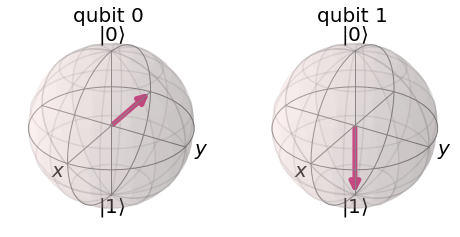

In [38]:
# plot post measurement for Q0
plot_bloch_multivector(sv)

In [37]:
# Or we can just get the statevector from instructions but we need to remove measurement
# Question #1
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc_1 = QuantumCircuit(qr,cr)
# lets set control in superpositon of all states |+⟩
# when unitary is X gate and and target is set to the eigenvalue |-⟩ that can be obtained by applying H on |1⟩ state 
qc_1.h(0)
qc_1.x(1) # set target to 1
qc_1.h(1) # set target qubit to |-⟩
qc_1.cx(0,1)
qc_1.draw()
statevector = Statevector.from_instruction(qc_1)
print(statevector) #we will find  final state is a product state |-⟩|-⟩
# So our answer to question #1 is when the target is set to |-⟩ state and control unitary is
# a CNot gate, a control of 1 will get a phase of -1 and we have checked same
# by setting i/p to |+⟩

Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


In [39]:
# Question #2
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc_2 = QuantumCircuit(qr,cr)
# lets set control in superpositon of all states |+⟩
# when controlled unitary is CY gate and target is set to the eigenvalue |i+⟩ that can be obtained by applying S on |+⟩ state 
qc_2.h(0)  # set control to equal superposition of |0⟩ and |1⟩
qc_2.h(1) # set target to |+⟩
qc_2.s(1) # set target qubit to |i+⟩
qc_2.cy(0,1)
# since our state is a product state and seperable we can make a partial measurement 
# and collapse state one qubit quantum state, let's measure MSB or the target qubit in this case  
qc_2.measure([1],[0]) 
qc_2.draw()


┌───┐             
q178_0: ┤ H ├───────■─────
        ├───┤┌───┐┌─┴─┐┌─┐
q178_1: ┤ H ├┤ S ├┤ Y ├┤M├
        └───┘└───┘└───┘└╥┘
 c16: 1/════════════════╩═
                        0

In [41]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc_2, backend, shots=1)
sv = job.result().get_statevector(qc_2,2)
print(sv)
# get the statevector associated with the LSB or the control qubit
if (sv[0] != 0) :
    sv_0 = [sv[0], sv[1]]
else : 
    sv_0 = [sv[2], sv[3]]
# In statevector we can see that the probability amplitudes have been
# renormalized to 1/root(2) and state we get is equivalent to |+⟩
print(sv_0)
# hence we can see that when target has eigenvalue of +1 the state of
# control qubit is not getting any phase and remains unaffected as |+⟩ 

Statevector([0.71+0.j, 0.71-0.j, 0.  +0.j, 0.  +0.j],
            dims=(2, 2))
[(0.71+0j), (0.71-0j)]


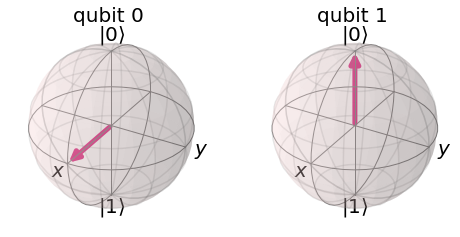

In [42]:
# Plot post measurement state for qubit 0
plot_bloch_multivector(sv)

In [47]:
# Question #3
from qiskit.circuit.library.standard_gates import SGate
cntr_sgate = SGate().control(1) # just one control
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc_3 = QuantumCircuit(qr,cr)
# lets set control in superpositon of all states |+⟩
# when controlled unitary is rz(pi/2) gate and target is set to |1⟩ state 
qc_3.h(0)  # set control to equal superposition of |0⟩ and |1⟩
qc_3.x(1) # set target to |1⟩
qc_3.append(cntr_sgate,[0,1])
# since our state is a product state and seperable we can make a partial measurement 
# and collapse state one qubit quantum state, let's measure MSB or the target qubit in this case  
qc_3.measure([1],[0]) 
qc_3.draw()

┌───┐        
q219_0: ┤ H ├──■─────
        ├───┤┌─┴─┐┌─┐
q219_1: ┤ X ├┤ S ├┤M├
        └───┘└───┘└╥┘
 c19: 1/═══════════╩═
                   0

In [48]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc_3, backend, shots=1)
sv = job.result().get_statevector(qc_3,2)
print(sv)
# get the statevector associated with the LSB or the control qubit
if (sv[0] != 0) :
    sv_0 = [sv[0], sv[1]]
else : 
    sv_0 = [sv[2], sv[3]]
# In statevector we can see that the probability amplitudes have been
# renormalized to 1/root(2) and state we get is equivalent to |+⟩
print(sv_0)
# hence we can see that when target has eigenvalue of +1 the state of
# control qubit is not getting any phase and remains unaffected as |+⟩ 

Statevector([0.  +0.j  , 0.  +0.j  , 0.71+0.j  , 0.  +0.71j],
            dims=(2, 2))
[(0.71+0j), 0.71j]


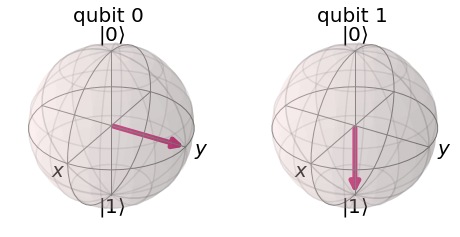

In [51]:
# Plot post measurement state for qubit 0
plot_bloch_multivector(sv)

In [52]:
#Question #4  compare between CRz and CZ
#Implement a circuit with crz(pi)
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc_4 = QuantumCircuit(qr,cr)
# lets set control in superpositon of all states |+⟩
# when controlled unitary is CY gate and target is set to the eigenvalue |i+⟩ that can be obtained by applying S on |+⟩ state 
qc_4.h(0)  # set control to equal superposition of |0⟩ and |1⟩
qc_4.x(1) # set target to |1⟩
qc_4.crz(np.pi,0,1)
# since our state is a product state and seperable we can make a partial measurement 
# and collapse state one qubit quantum state, let's measure MSB or the target qubit in this case  
# qc_4.measure([1],[0])  we will simply print the entire statevector
qc_4.draw()


┌───┐         
q228_0: ┤ H ├────■────
        ├───┤┌───┴───┐
q228_1: ┤ X ├┤ Rz(π) ├
        └───┘└───────┘
 c20: 1/══════════════

Statevector([-0.  +0.j  ,  0.  +0.j  ,  0.71+0.j  ,  0.  +0.71j],
            dims=(2, 2))


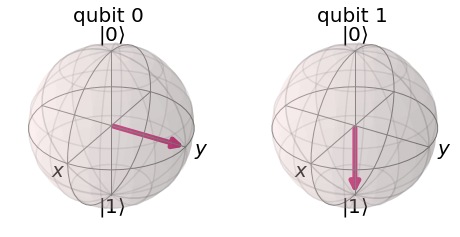

In [53]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc_4, backend, shots=1)
sv = job.result().get_statevector(qc_4,2)
print(sv)
plot_bloch_multivector(sv)

In [54]:
#Implement a circuit with cz(pi)
qr = QuantumRegister(2)
cr = ClassicalRegister(1)
qc_4 = QuantumCircuit(qr,cr)
# lets set control in superpositon of all states |+⟩
# when controlled unitary is CY gate and target is set to the eigenvalue |i+⟩ that can be obtained by applying S on |+⟩ state 
qc_4.h(0)  # set control to equal superposition of |0⟩ and |1⟩
qc_4.x(1) # set target to |1⟩
qc_4.cz(0,1)
# since our state is a product state and seperable we can make a partial measurement 
# and collapse state one qubit quantum state, let's measure MSB or the target qubit in this case  
# qc_4.measure([1],[0])  we will simply print the entire statevector
qc_4.draw()


┌───┐   
q240_0: ┤ H ├─■─
        ├───┤ │ 
q240_1: ┤ X ├─■─
        └───┘   
 c21: 1/════════

Statevector([ 0.  +0.j,  0.  +0.j,  0.71+0.j, -0.71+0.j],
            dims=(2, 2))


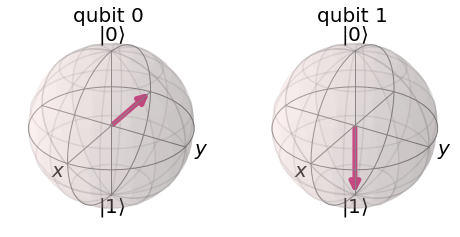

In [57]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc_4, backend, shots=1)
sv = job.result().get_statevector(qc_4,2)
print(sv)
plot_bloch_multivector(sv)

In [58]:
#Results shows that crz(pi) added a global phase of pi/2 however a CZ
#adds a phase of pi. It helps us understand how spinors and fermions behave 
#under the rotations

In [59]:
# end of program